In [1]:
import networkx as nx

All from https://networkx.org/documentation/stable/tutorial.html

# Some different ways to construct graphs

## Classic graphs

In [2]:
# A complete graph with n=5 nodes. This means every node is connected
# to every other node.
K_5 = nx.complete_graph(5)

# A complete bipartite graph
# two sets (one of 3 and one of 5) that are not connected internally,
# but are connected to each node from the other set. 
K_3_5 = nx.complete_bipartite_graph(3, 5)

# Two complete graphs connected by a path. Complete graphs are of same size.
# m1 defines the size of left and right barbells.
# m2 defines length of path connecting the barbells.
barbell = nx.barbell_graph(m1=10, m2=10)

# A basrbell without the right-side.
# m for number of nodes in complete graph. 
# n for nodes in path.
lollipop = nx.lollipop_graph(m=10, n=20)


# See the helpful image for visualisations.

## Stochastic graph generators

Generating random graphs

In [3]:
# Returns a random graph, knwon as an erdos renyi graph.
# n is the number of nodes.
# p is the probability of an edge being created.
er = nx.erdos_renyi_graph(n=100, p=0.15)

In [4]:
# Creates a Watts Strogatz small-world graph
# n is the number of nodes
# k is the number of nearest neighbours to connect to, 
# being the size of the ring lattice/clique.
# p is the probability of rewiring an edge.
ws = nx.watts_strogatz_graph(n=30, k=3, p=0.1)


A small-world graph tends to have small cliques or near-cliques (known as sub-networks) which are close to being complete. There are a few connections between different cliques. Imagine a social netowrk, which tends to create small-world graphs. A group of people will be connected via friends knowing friends., In some casaes there will be external connections between two sub-cliques via one-off encounters from holidays, for example, in which two people from different social circles may connect, linking the two sub-networks.

In [5]:
# Generates graphs using the Barabasi-Albert preferential attachment model.
# This is stochastic, so the graph will be different each time.
# Nodes with more edges (higher degree) are more likely to receive new edges.
# n is the number of nodes.
# m is the number of edges to attach from a new node to existing nodes.
# m must be less than n.
ba = nx.barabasi_albert_graph(n=100, m=5)

In [6]:
# Creates a random lobster graph.
# n is the number of nodes on the backbone (original path graph)
# p1 is the probability of adding an edge to the path graph. Set to 0 to make a path graph.
# p2 is the probability of adding an edge on nodes one degree away from the path graph. Set to 0 to make a caterpillar graph.
red = nx.random_lobster(n=100, p1=0.9, p2=0.9)

A lobster is a tree that reduces to a caterpillar when pruning all leaf nodes. All leaf nodes are therefore 2 degrees from a base path graph.

A caterpillar is a tree that reduces to a path graph when pruning all leaf nodes. All leaf nodes are therefore 1 degree from a base path graph.

As before, helpful_graphs has some useful diagrams.

## Reading graphs from files

networkx can use edge lists, adjacency lists (both can be from a txt file), GML, GraphML, LEDA, and others.

In [ ]:
# gml example
nx.write_gml(red, "path.to.file")
my_graph = nx.read_gml("path.to.file")

## Analysing graphs

In [ ]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
# For unconnected graph, we provide a list of connected components.
# note here that 'spam' is not connected to the rest of the graph.
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [ ]:
# Returns a list of tuples, where each tuple is a node and its degree.
# The nodes are sorted by degree.
sorted(d for n, d in G.degree()) # ['spam', 2, 3, 1]

[0, 1, 1, 2]

In [ ]:
# Returns a list of tuples, where each tuple is a node and its clustering coefficient.
# A clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together.
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [11]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

## NetworkX Backkends and Automatic Dispatch

### To do

## Drawing Graphs

We need either matplotlib.pylot or pylab. We'll use the former.

In [13]:
%pip install matplotlib

     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     -------------------------------------- 104.0/104.0 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.0 MB 50.3 MB/s eta 0:00:01
   ------------------------- -------------- 5.1/8.0 MB 54.6 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 56.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 51.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/219.8 kB ? eta -:--:--
   --------------------------------------- 219.8/219.8 kB 13.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------  2.2/2.2 MB 70.4 MB/s eta 0:00:01
   -------------------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import matplotlib.pyplot as plt

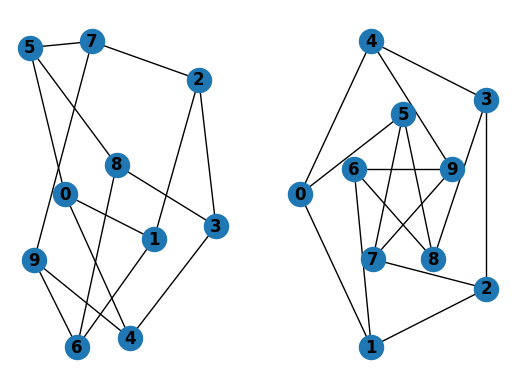

In [15]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

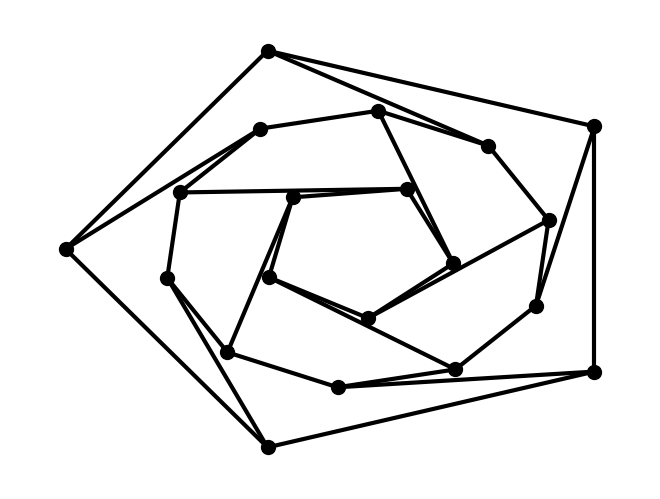

In [ ]:
# You can set options
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}

G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)